In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(0)
n_samples = 20
samples = int(n_samples/2)
degrees = np.array([0, 1, 3, 9])
N = np.random.normal(loc=0.0, scale=1.0, size=n_samples)
N_train, N_test = np.split(N, 2)

In [ ]:
def actual_fun(x, n):
    return np.sin(2*np.pi*x) + 0.1 * n

Text(0, 0.5, 'Y')

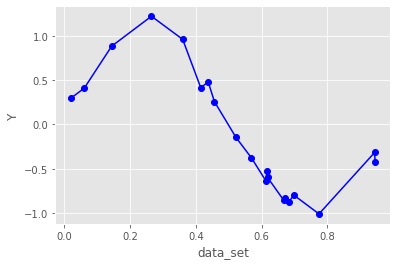

In [ ]:
data_set = np.sort(np.random.uniform(low=0.0, high=1.0, size=n_samples))
Y = actual_fun(data_set, N)
plt.tight_layout()
plt.plot(data_set, Y, label="Actual Function", marker='o', color='b')
plt.xlabel("data_set")
plt.ylabel("Y")

In [ ]:
X_train, X_test = np.split(data_set, 2)
Y_train = actual_fun(X_train, N_train)
Y_test = actual_fun(X_test, N_test)

Text(0, 0.5, 'Y_train')

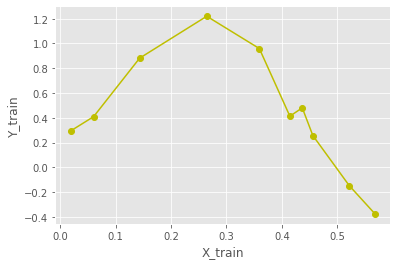

In [ ]:
plt.tight_layout()
plt.plot(X_train, Y_train, label="Training Data", marker='o', color='y')
plt.xlabel("X_train")
plt.ylabel("Y_train")

Text(0, 0.5, 'Y_test')

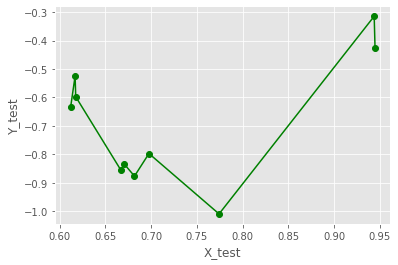

In [ ]:
plt.tight_layout()
plt.plot(X_test, Y_test, label="Validation Data", marker='o', color='g')
plt.xlabel("X_test")
plt.ylabel("Y_test")

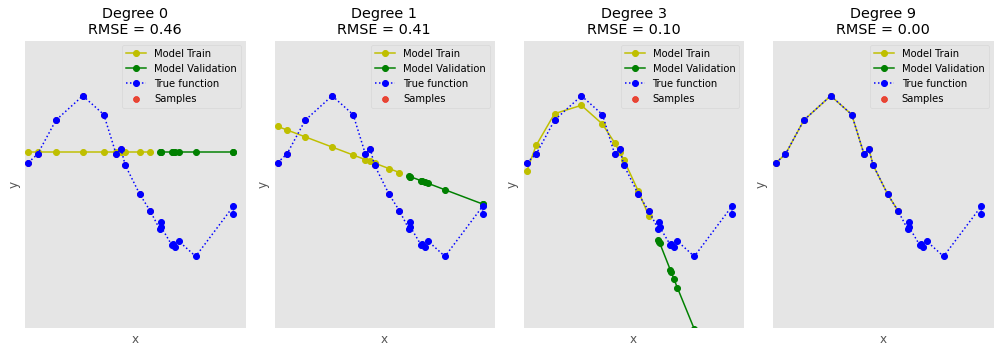

In [ ]:
plt.figure(figsize=(14, 5))
train_loss = []
validation_loss = []
weights = []
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    linear_regression = LinearRegression()
    pipeline = make_pipeline(PolynomialFeatures(degrees[i]), linear_regression)
    pipeline.fit(X_train[:, np.newaxis], Y_train)

    weights.append(list(linear_regression.coef_))

    prediction_train = pipeline.predict(X_train[:, np.newaxis])
    train_loss.append(math.sqrt(mean_squared_error(Y_train, prediction_train)))

    prediction_test = pipeline.predict(X_test[:, np.newaxis])
    validation_loss.append(math.sqrt(mean_squared_error(Y_train, prediction_test)))

    plt.plot(X_train, prediction_train, label="Model Train", marker='o', color='y')
    plt.plot(X_test, prediction_test, label="Model Validation", marker='o', color='g')
    plt.plot(data_set, Y, label="True function", linestyle=':', marker='o', color='b')
    plt.scatter(X_train, Y_train, label="Samples",edgecolors='r')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nRMSE = {:.2f}".format(degrees[i], train_loss[i]))
plt.tight_layout()
plt.show()

In [ ]:
weight_labels = ['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9']
degree_lables = []
for i in degrees:
    degree_lables.append('Degree='+str(i))
table_regularize = pd.DataFrame(weights, columns=weight_labels, index=degree_lables)
table_regularize.fillna("")

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9
Degree=0,0.0,,,,,,,,,
Degree=1,0.0,-1.16378,,,,,,,,
Degree=3,0.0,10.545,-28.0027,14.2426,,,,,,
Degree=9,0.0,-4939.68,139966,-1.80992e+06,1.27296e+07,-5.29422e+07,1.34129e+08,-2.03575e+08,1.70258e+08,-6.0369e+07


In [ ]:
degree_lables = []
for i in degrees:
    degree_lables.append('Degree='+str(i))
pd.DataFrame({'training loss': train_loss, 'validation loss': validation_loss}, index=degree_lables)

,training loss,validation loss
Degree=0,4.627385e-01,0.462739
Degree=1,4.103842e-01,0.592442
Degree=3,1.034693e-01,2.082755
Degree=9,3.261626e-10,281664.538268


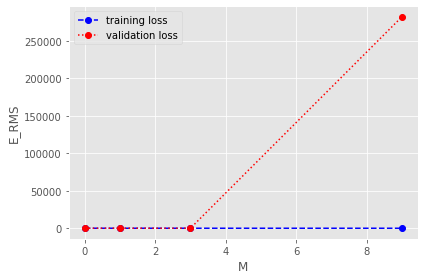

In [ ]:
plt.figure()
plt.style.use('ggplot')
plt.plot(degrees, train_loss, label='training loss', linestyle='--', marker='o', color='b')
plt.plot(degrees, validation_loss, label='validation loss', linestyle=':', marker='o', color='r')
plt.xlabel("M")
plt.ylabel("E_RMS")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
n_samples = 100
samples = int(n_samples/2)

N = np.random.normal(loc=0.0, scale=1.0, size=n_samples)
N_train, N_test = np.split(N, 2)

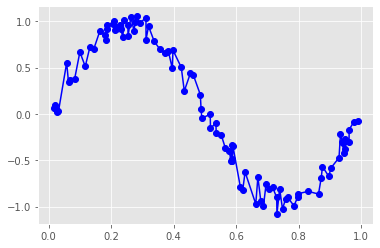

In [ ]:
data_set = np.sort(np.random.uniform(low=0.0, high=1.0, size=n_samples))
Y = actual_fun(data_set, N)
plt.tight_layout()
plt.plot(data_set, Y, label="Actual Function", marker='o', color='b')

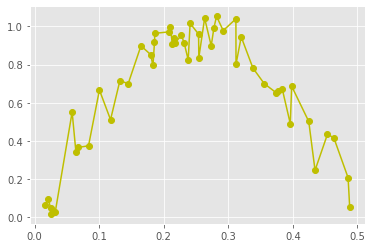

In [ ]:
X_train, X_test = np.split(data_set, 2)
plt.tight_layout()
plt.plot(X_train, actual_fun(X_train, N_train), label="Training Data", marker='o', color='y')

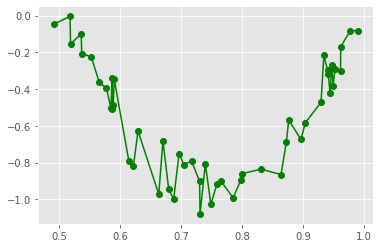

In [ ]:
plt.tight_layout()
plt.plot(X_test, actual_fun(X_test, N_test), label="Validation Data", marker='o', color='g')

In [ ]:
Y_train = actual_fun(X_train, N_train) + np.random.normal(loc=0.0, scale=1.0, size=samples)
Y_test = actual_fun(X_test, N_test) + np.random.normal(loc=0.0, scale=1.0, size=samples)

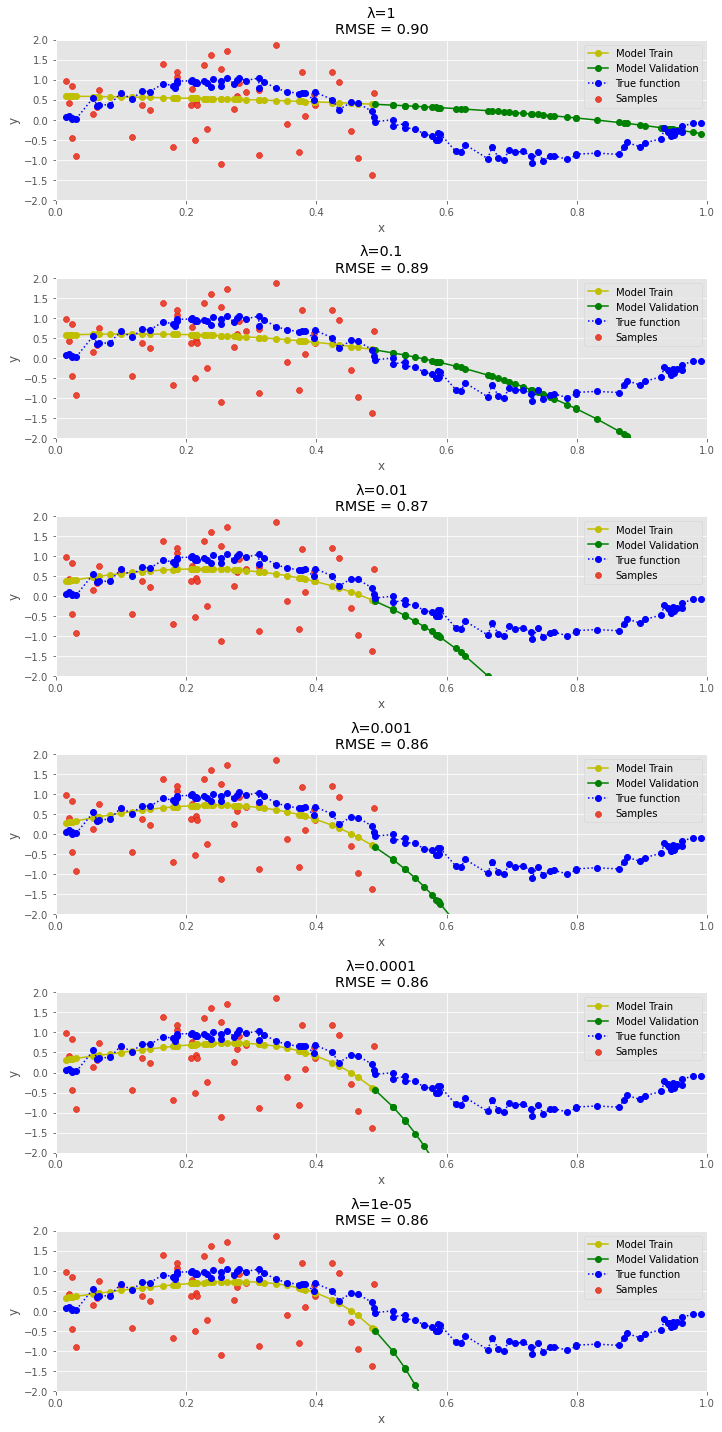

In [ ]:
alphas = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
fig, axs = plt.subplots(len(alphas), figsize=(10, 20))
degree = 9
train_loss = []
validation_loss = []
weights = []

for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  pipeline = make_pipeline(PolynomialFeatures(degree), ridge)
  pipeline.fit(X_train[:, np.newaxis], Y_train)

  weights.append(list(ridge.coef_))

  prediction_train = pipeline.predict(X_train[:, np.newaxis])
  train_loss.append(math.sqrt(mean_squared_error(Y_train, prediction_train)))

  prediction_test = pipeline.predict(X_test[:, np.newaxis])
  validation_loss.append(math.sqrt(mean_squared_error(Y_train, prediction_test)))

  axs[alphas.index(alpha)].plot(X_train, prediction_train, label="Model Train", marker='o', color='y')
  axs[alphas.index(alpha)].plot(X_test, prediction_test, label="Model Validation", marker='o', color='g')
  axs[alphas.index(alpha)].plot(data_set, Y, label="True function", linestyle=':', marker='o', color='b')
  axs[alphas.index(alpha)].scatter(X_train, Y_train, label="Samples",edgecolors='r')
  axs[alphas.index(alpha)].set_xlabel("x")
  axs[alphas.index(alpha)].set_ylabel("y")
  axs[alphas.index(alpha)].set_xlim((0, 1))
  axs[alphas.index(alpha)].set_ylim((-2, 2))
  axs[alphas.index(alpha)].set_title("λ={}\nRMSE = {:.2f}".format(alpha, train_loss[alphas.index(alpha)]))
  axs[alphas.index(alpha)].legend(loc="best")
fig.tight_layout()
fig.show()

In [ ]:
col_name = []
for i in alphas:
    col_name.append('λ='+str(i))
table_regularize = pd.DataFrame(weights, columns=weight_labels, index=col_name)
table_regularize.fillna("")

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9
λ=1,0.0,-0.199782,-0.313981,-0.211954,-0.118261,-0.061277,-0.030657,-0.015060,-0.007323,-0.003541
λ=0.1,0.0,0.431274,-1.542019,-1.285648,-0.776855,-0.420417,-0.216261,-0.108314,-0.053430,-0.026116
λ=0.01,0.0,2.875142,-4.555851,-4.477670,-2.965158,-1.709946,-0.921547,-0.478151,-0.242425,-0.121080
λ=0.001,0.0,3.317382,-2.996089,-7.356264,-6.924316,-4.849957,-2.952114,-1.663260,-0.894259,-0.466324
λ=0.0001,0.0,1.904791,2.452251,-7.886054,-13.981942,-12.404675,-8.517970,-5.153901,-2.900140,-1.557603
λ=1e-05,0.0,2.702859,-5.365974,13.563111,-20.001441,-28.687410,-22.514050,-14.275078,-8.119532,-4.311571


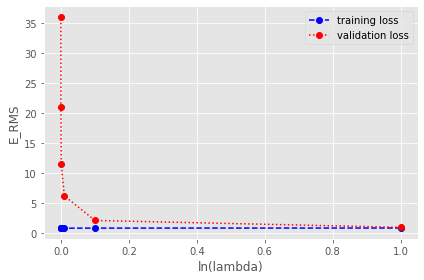

In [ ]:
plt.figure()
plt.style.use('ggplot')
plt.plot(alphas, train_loss, label='training loss', linestyle='--', marker='o', color='b')
plt.plot(alphas, validation_loss, label='validation loss', linestyle=':', marker='o', color='r')
plt.xlabel("ln(lambda)")
plt.ylabel("E_RMS")
plt.legend()
plt.tight_layout()
plt.show()